In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
plt.style.use('classic')


In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [41]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df.loc[df['species'] == 'setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.loc[df['species'] == 'versicolor'].head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [45]:
df.loc[df['species'] == 'virginica'].head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [46]:

virginica_flowers = df.loc[df['species'] == 'virginica']
setosa_flowers = df.loc[df['species'] == 'setosa']


In [47]:
len(virginica_flowers)

50

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

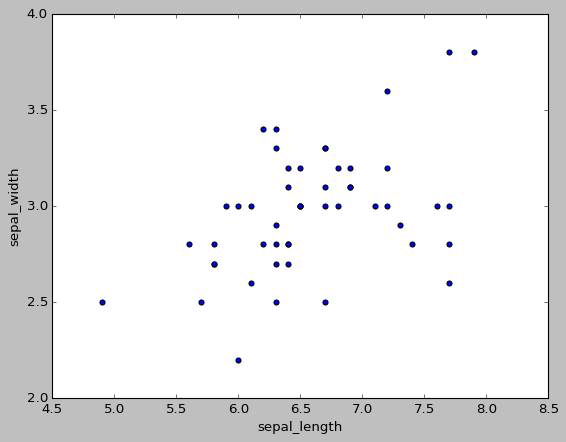

In [48]:
virginica_flowers.plot(x = 'sepal_length', y = 'sepal_width', kind = 'scatter')

In [49]:
vg_sl = virginica_flowers['sepal_length']
vg_sw = virginica_flowers['sepal_width']

s_sl = setosa_flowers['sepal_length']
s_sw = setosa_flowers['sepal_width']



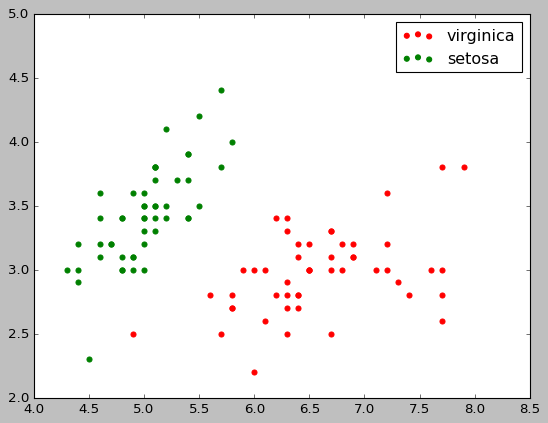

In [51]:
plt.scatter([vg_sl],[vg_sw], color = 'red', label = 'virginica')
plt.scatter([s_sl],[s_sw], color = 'green', label = 'setosa')
plt.legend(loc = 'upper right')


In [52]:
vg_pl = virginica_flowers['petal_length']
vg_pw = virginica_flowers['petal_width']

s_pl = setosa_flowers['petal_length']
s_pw = setosa_flowers['petal_width']

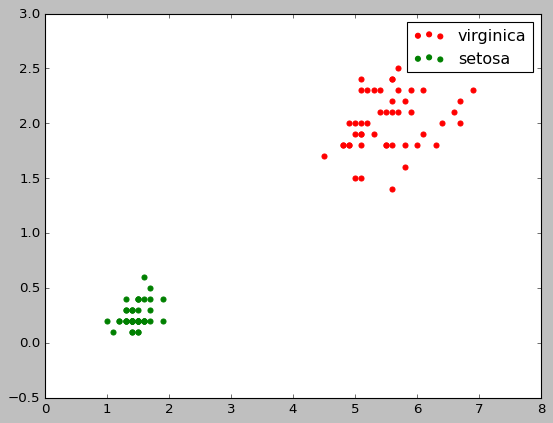

In [53]:
plt.scatter([vg_pl],[vg_pw], color = 'red', label = 'virginica')
plt.scatter([s_pl],[s_pw], color = 'green', label = 'setosa')
plt.legend(loc = 'upper right')

preprocess

kinds of y:
    Numerical/Comtinous (34.23,2345.67)
    Categorical (1,2,3)

In [90]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [55]:
y = df['species']

In [56]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Species - Categorical and Nominal
use one hot encoding


In [58]:
pd.get_dummies(y)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [65]:
y = LabelBinarizer().fit_transform(y)

In [66]:
y.shape

(150, 3)

Define X - the data for training


In [67]:
x = df.loc[:, df.columns!='species']

In [69]:
x.shape

(150, 4)

In [70]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
x = x.to_numpy()

In [73]:
type(x)

numpy.ndarray

In [74]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [86]:
x_train.shape

(135, 4)

In [87]:
x_test.shape

(15, 4)

In [88]:
y_train.shape

(135, 3)

In [89]:
y_test.shape

(15, 3)

In [91]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [93]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
print(knn_model.predict(x_test))

[[0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [96]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [97]:
knn_model.score(x_test, y_test)

1.0

In [98]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

In [101]:
clf = MLPClassifier(solver='lbfgs', alpha=le-5, hidden_layer_sizes=(5,2),random_state=1)

NameError: name 'MLPClassifier' is not defined